# <center><b> <em> Feature Engineering </em> </b></center>

### <font color="green"> | - Import des Biblio et Dataframe</font>

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [119]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

# Vérifier les types de données
print(data.dtypes)

invoice                 object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id             object
country                 object
dtype: object


In [120]:
data.tail()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1033035,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [121]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


### <font color="green"> || - Ajout column Total Price </font>

In [122]:
data["total_price"] = data["quantity"] * data["unit_price"]

In [123]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [124]:
data[(data['unit_price'] == 0) ]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom,-0.0
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom,-0.0
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom,-0.0
462,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,-0.0
3077,489655,20683,RAIN GIRL CHILDS UMBRELLA,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
1028147,581234,72817,SET/2 CHRISTMAS DECOUPAGE CANDLES,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0
1029653,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
1029654,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
1029703,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,0.0


### <font color="green"> ||| - RFM Analysis </font>

## <font color="purple"> 
 - <b> Recency </b> : the number of days between today_date and the last purchase date of this customer  

 - <b> Frequency </b> : the number of purchase of this customer  

 - <b> Monetary </b> : sum of TotalPrice of this customer 

 
 </font>


In [125]:
today_date = dt.datetime(2011, 12, 11)

In [126]:
RFM_data = data.groupby('customer_id').agg({'invoice_date': lambda invoice_date: (today_date - invoice_date.max()).days,
                                     'invoice': lambda invoice: invoice.nunique(),
                                     'total_price': lambda total_price: total_price.sum()})
RFM_data.columns = ["recency", "frequency", "monetary"]

In [127]:
RFM_data.head()
#kmeans num et kproto mixte 
#passer de 800 à 500 mill faire un groupe by par cluster après (savoir qeu'estce qui caractérise un cluster en faisant une moy, describe....)  (justif pour la méthode du coude pour enlever ou ajouter un cluster)
#utiliser ACP pour visualiser les variables 4 (hue par cluster)

,recency,frequency,monetary
customer_id,,,
12346.0,326,17,-51.74
12347.0,3,8,4921.53
12348.0,76,5,2019.40
12349.0,19,5,4404.54
12350.0,311,1,334.40


In [128]:
df_cancelled = data[data["invoice"].str.contains("C", na=False)]
df_cancelled.head(6)

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia,-15.0


In [129]:
df_price = data.groupby("customer_id").agg({"total_price": [lambda x: abs(x).sum(), lambda x: x[x < 0].sum(), lambda x : abs(x[x < 0].sum()*100/abs(x).sum()) ]})

/tmp/ipykernel_59669/2081888143.py:1: RuntimeWarning: invalid value encountered in double_scalars
  df_price = data.groupby("customer_id").agg({"total_price": [lambda x: abs(x).sum(), lambda x: x[x < 0].sum(), lambda x : abs(x[x < 0].sum()*100/abs(x).sum()) ]})


In [130]:
df_price.columns = ['payed_amount', 'refund_amount', 'pourcentage']

In [131]:
df_price.head()

,payed_amount,refund_amount,pourcentage
customer_id,,,
12346.0,155164.66,-77608.20,50.016673
12347.0,4921.53,0.00,0.000000
12348.0,2019.40,0.00,0.000000
12349.0,4452.84,-24.15,0.542350
12350.0,334.40,0.00,0.000000


In [132]:
rfm_data =pd.merge(RFM_data, df_price, on='customer_id')

In [133]:
rfm_data.head()

,recency,frequency,monetary,payed_amount,refund_amount,pourcentage
customer_id,,,,,,
12346.0,326,17,-51.74,155164.66,-77608.20,50.016673
12347.0,3,8,4921.53,4921.53,0.00,0.000000
12348.0,76,5,2019.40,2019.40,0.00,0.000000
12349.0,19,5,4404.54,4452.84,-24.15,0.542350
12350.0,311,1,334.40,334.40,0.00,0.000000


In [134]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5942 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        5942 non-null   int64  
 1   frequency      5942 non-null   int64  
 2   monetary       5942 non-null   float64
 3   payed_amount   5942 non-null   float64
 4   refund_amount  5942 non-null   float64
 5   pourcentage    5939 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 325.0+ KB


### Data Analyse

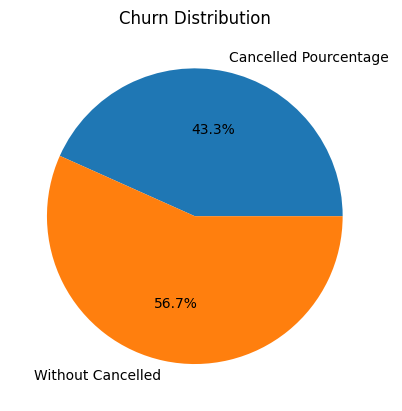

In [135]:
# Calculer le nombre de clients avec churn et sans churn
with_churn = len(df_price[df_price["pourcentage"] > 0])
without_churn = len(df_price[df_price["pourcentage"] == 0])

# Créer les données pour le graphique
churn_data = [with_churn, without_churn]
labels = ["Cancelled Pourcentage ", "Without Cancelled"]

# Créer le graphique circulaire
plt.pie(churn_data, labels=labels, autopct='%1.1f%%')

# Définir le titre du graphique
plt.title("Churn Distribution")

# Afficher le graphique
plt.show()

### <font color="green"> V - Export gold Data </font>

In [ ]:
#EXporter la data dans un Csv 
rfm_data.to_csv('../data/rfm.csv', index=False)